In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, array
import numpy as np
import seaborn as sns

In [10]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
df = pd.read_csv(r"USArrests.csv")

df.head(50)

,State,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


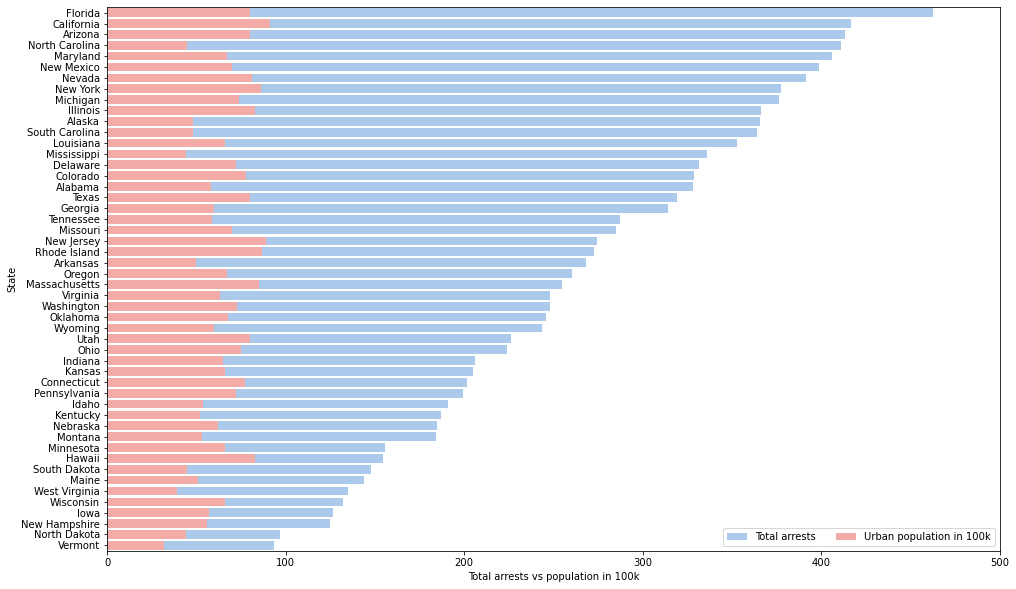

In [4]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="State", data=stats,
            label="Total arrests", color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="State", data=stats,
            label="Urban population in 100k", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 500), ylabel="State",
       xlabel="Total arrests vs population in 100k");


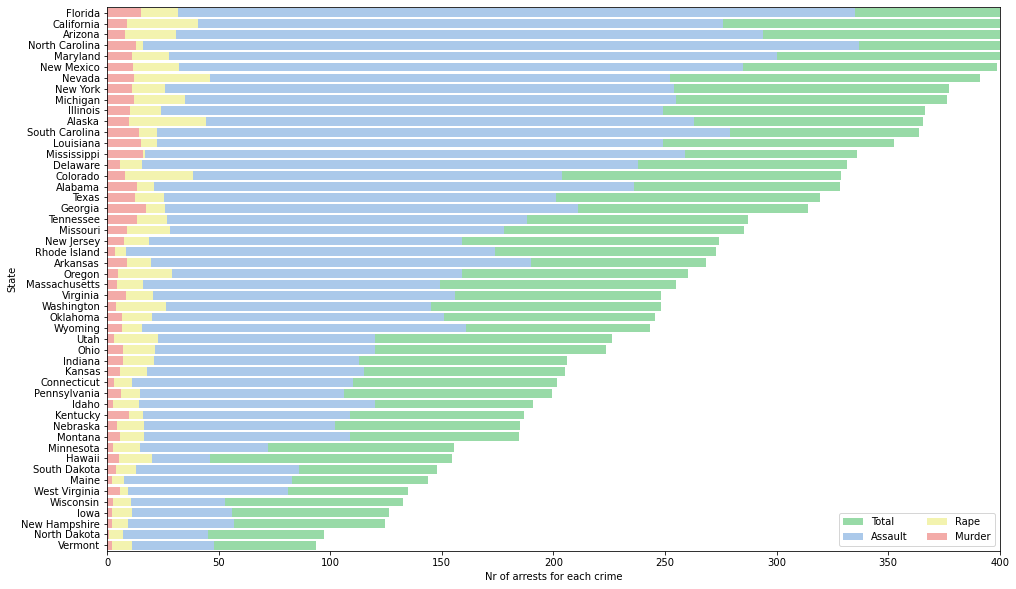

In [5]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

In [6]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.088861
3,4,57.738535
4,5,50.071171
5,6,43.851539
6,7,39.258705
7,8,35.988784
8,9,31.897453
9,10,27.094489


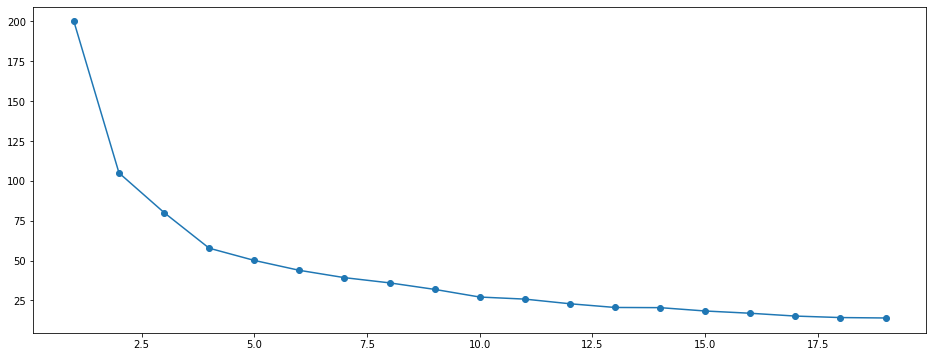

In [8]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [9]:

X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


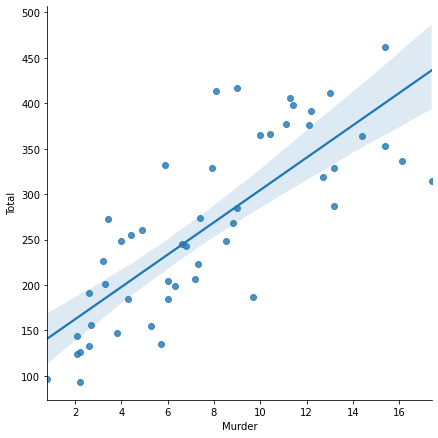

In [10]:
sns.lmplot(x='Murder' ,y='Total', data=df,
        
        fit_reg=True, height = 6 )

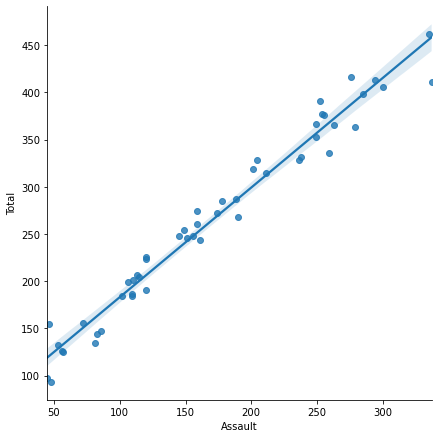

In [11]:
sns.lmplot(x='Assault',y='Total' , data=df,
        
        fit_reg=True, height = 6 )

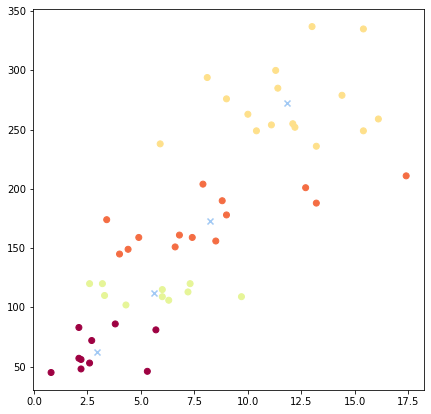

In [12]:
data=X
clusters = KMeans(4);
clusters.fit(X);

plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='b')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

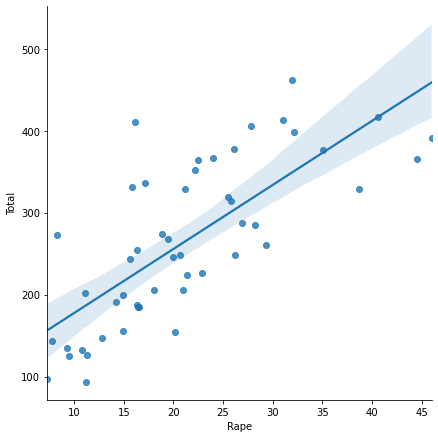

In [13]:
sns.lmplot(x='Rape',y='Total' , data=df,
        
        fit_reg=True, height = 6 )

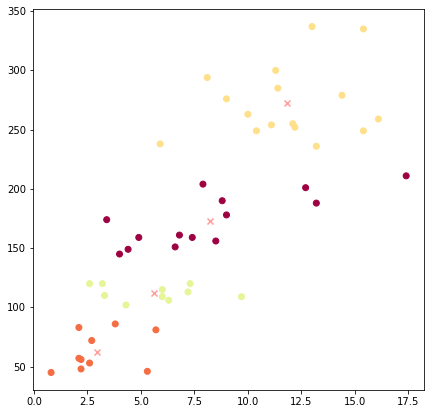

In [14]:
data=X
clusters = KMeans(4);
clusters.fit(X);

plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 


In [15]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head()

,State,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
44,Vermont,2.2,48,32,11.2,93.4,2
33,North Dakota,0.8,45,44,7.3,97.1,2
28,New Hampshire,2.1,57,56,9.5,124.6,2
14,Iowa,2.2,56,57,11.3,126.5,2
48,Wisconsin,2.6,53,66,10.8,132.4,2


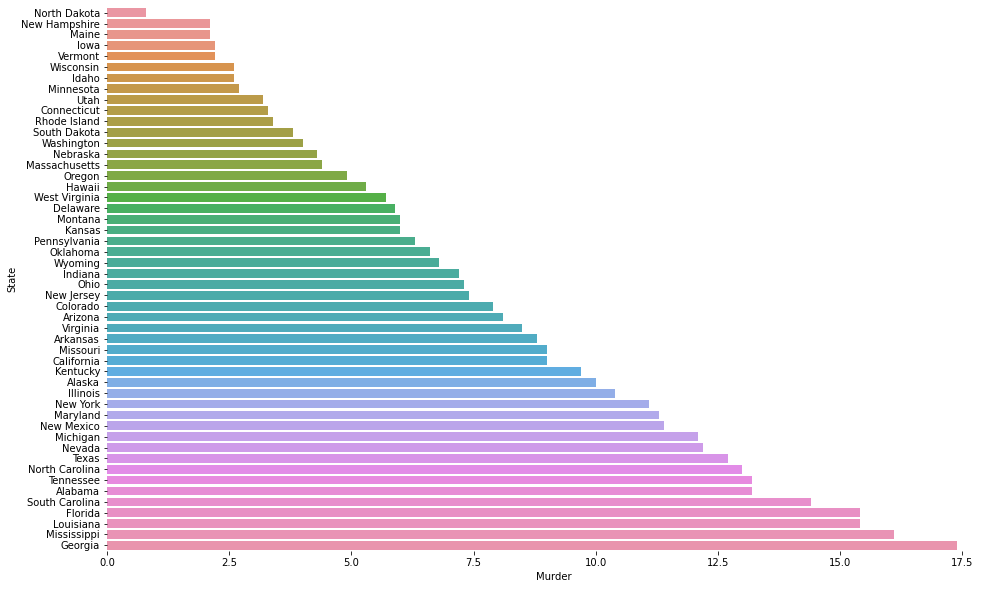

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values([ "Murder"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="State", x="Murder", data=stats)

sns.despine(left=True, bottom=True)